In [1]:
import numpy as np
import pandas as pd

In [2]:
try:
    ls=[EE_df]
    del EE_df
    del ls
except  NameError:
     pass

EE_df=pd.read_csv("./Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates_2.csv")

In [3]:
EE_df.head()

,Sensor,Date,Volume,Event Label,St Label,Lat,Lng,Direction,Freeway Tag
0,S125,10/3/2018,27018,October Wed 2018,WB 94 from dwtn,44.99888,-93.28266,From,1
1,S137,10/3/2018,35116,October Wed 2018,EB 94 to dwtn,44.99898,-93.28297,To,1
2,S2,10/3/2018,0,October Wed 2018,SB 35W from dwtn,44.96259,-93.26997,From,2
3,S285,10/3/2018,74299,October Wed 2018,WB 394 from dwtn,44.97002,-93.30761,From,3
4,S286,10/3/2018,68473,October Wed 2018,EB 394 to dwtn,44.96977,-93.30786,To,3


In [4]:
# len(EE_df)
# set(list(EE_df["Sensor"].values))
# EE_df.columns
def modi_Twins_Opener(x):
    try:
        if (x.split()[1]=="Twins")and(x.split()[2]=="Opener"):
            return '2018 Twins Opener'
        else:
            return x
    except:
        return x
            
    
EE_df["Event Label_2"]=EE_df["Event Label"].apply(modi_Twins_Opener);
EE_df.drop(columns=["Event Label"],inplace=True);
EE_df.rename(columns={"Event Label_2":"Event Label"},inplace=True);

#EE_df.set_index(["Event Label","Sensor"]);
def FromOrTodowntown(x):
    def fromto(y):
        if y=="from":
            return "out"
        else:
            return "in"
    return fromto(x.split()[-2])
def road(x):
    a=list(x.split())[0:2]
    return ' '.join(a[::-1])

EE_df["Direction(from/to)"]=EE_df["St Label"].apply(FromOrTodowntown);
EE_df["road"]=EE_df["St Label"].apply(road);

EE_df.head();
events=list(EE_df["Event Label"].unique());
events=list(EE_df["Event Label"].unique());

EE_df["sensor_name"]=EE_df["Sensor"]+'('+EE_df["road"]+")";
sensors=list(EE_df["sensor_name"].unique())

EE_df["name_sensor"]=EE_df["road"]+'('+EE_df[ "Sensor"]+")";


sensors=list(EE_df["sensor_name"].unique());
sensors2=list(EE_df["name_sensor"].unique());
len(events);
EE_df["sensor_fromto"]=EE_df["road"]+","+EE_df["Sensor"]+','+EE_df["Direction(from/to)"];
EE_df;

In [5]:
EE_df;

In [7]:
#https://github.com/jupyter-widgets/ipywidgets/issues/1582
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
sensor_out=["S2","S569","S285","S554","S125"]
sensor_in=["S64","S582","S286","S553","S137"]

def plot_flow_event(b):
    Num_of_event=events.index(b)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    aa.set_index("Sensor",inplace=True)
    sensors_in=aa.loc[sensor_in,"name_sensor"]
    sensors_out=aa.loc[sensor_out,"name_sensor"]
    flow_in=aa.loc[sensor_in,"Volume"]
    flow_out=aa.loc[sensor_out,"Volume"]
    
    
    fig, ax = plt.subplots(figsize=(15,5))
    opacity=0.8
    bar_width = 0.35
    index = np.arange(5)

    rects1 = plt.bar(index, flow_in, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
    rects2 = plt.bar(index+bar_width, flow_out, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')

#     print(index)
#     print(sensors_in.values)
#     fig, ax = plt.subplots(figsize=(15,5))
#     ax.bar(aa["Sensor"],aa["Volume"])
    #ax.set_xticklabels(index,tuple(sensors_in.values))
    #plt.set_xticklabels(position=[(1.,0),(2.,0)],labels=["A","B"])
    #ax.set_xticklabels(index+bar_width,aa["sensor_fromto"],rotation=45,ha="right")
    
    #plt.set_ylabel("vehicle flow")
    #plt.set_title(f"Traffic to and from MPLS\n{b}")
    #plt.legend()
    
    plt.xlabel('Routes')
    plt.ylabel('Volume of Cars')
    plt.title(f"Traffic to and from MPLS\n{b}")
    plt.xticks(index + bar_width, ('35W_SB(in)', '35W_NB(in)', '394WB(in)', '94WB(in)', '94WB(in)'))
    plt.legend()
    return None
w1=dict(b=widgets.Dropdown(options=events,value=events[0],description='event',disabled=False))
output = interactive_output(plot_flow_event, w1)
box = VBox([*w1.values(), output])
print("output in an interactive way")
display(box)

#plot_flow_event("October Wed 2018")

output in an interactive way


In [103]:
def plot_flow_sensor(b):
    Num_of_sensor=sensors.index(b)
    aa=EE_df.groupby(["sensor_name"]).get_group(b).sort_values(by="Event Label");
    #aa=aa[aa["road"]=="35W"]
    fig, ax = plt.subplots(figsize=(15,3))
    ax.bar(aa["Event Label"],aa["Volume"])
    ax.set_xticklabels(aa["Event Label"],rotation=45,ha="right")
    ax.set_ylabel("vehicle flow")
    ax.set_title(b)

w2=dict(b=widgets.Dropdown(options=sensors,value=sensors[0],description='Sensor',disabled=False))

output = interactive_output(plot_flow_sensor, w2)
box = VBox([*w2.values(), output])
display(box)

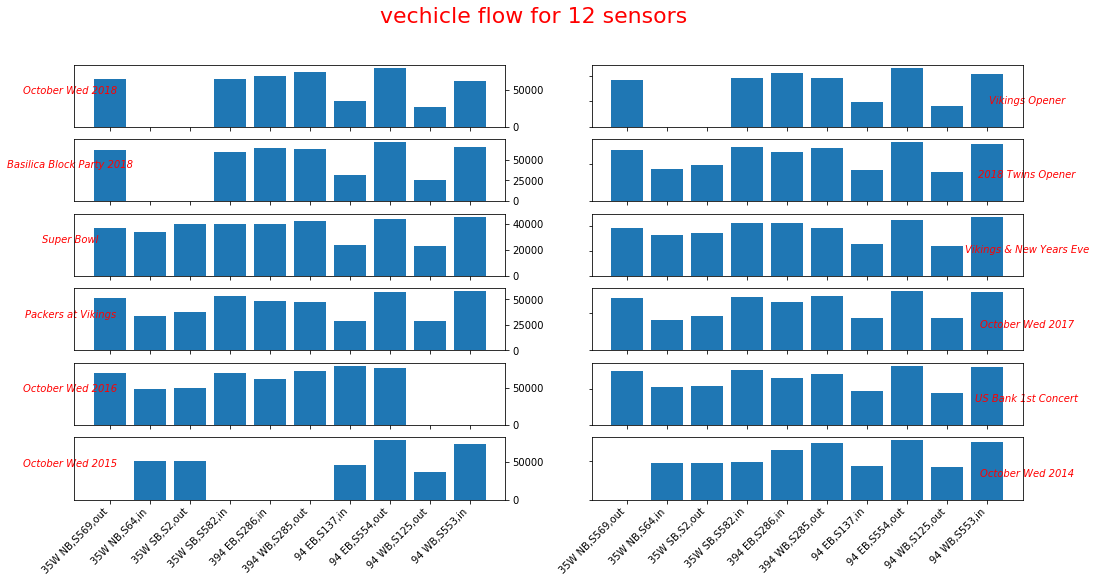

In [104]:
def plot_flow_event_all(b,ax):
    Num_of_event=events.index(b)
    b1,b2=(int(Num_of_event/2),Num_of_event%2)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    #fig, ax = plt.subplots(figsize=(15,5))
    ax[b1,b2].bar(aa["Sensor"],aa["Volume"])
    ax[b1,b2].set_xticklabels(aa["sensor_fromto"],rotation=45,ha="right")
    if (b2==0):
        ax[b1,b2].yaxis.tick_right()
        #ax[b1,b2].set_ylabel(b,rotation=0)
        
        box = ax[b1,b2].get_position()
        #ax[b1,b2].set_ylabel(b,rotation=45,fontstyle='oblique',position=(box.x0-box.width*0.4,box.y0))
        #ax[b1,b2].text(box.x0+box.width*0.4,box.y0,b,rotation=45,fontstyle='oblique')
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    else:
        ax[b1,b2].set_yticklabels('')
        ax[b1,b2].yaxis.set_label_position("right")
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    #ax[b1,b2].set_yticklabels(aa['road'],rotation=45,ha="right")
    
    
    #ax[b1,b2].set_title(b)
    #leg[b1,b2]=ax[b1,b2].set_label(b)
    return None
fig, ax = plt.subplots(6,2,sharex='all',figsize=(17,8))

# leg=np.zeros((6,2))
for b in events:
    plot_flow_event_all(b,ax)
title=fig.suptitle("vechicle flow for 12 sensors",fontsize=22,color="red")
#fig.legend(loc="right")
#fig.legend((leg[0,0],leg[0,1]), ('Line 1', 'Line 2'), 'upper left')
# box = ax[3,1].get_position()
# pos=ax[].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# leg=ax1.legend(loc='upper left', bbox_to_anchor=(1, 1.0))

# Some observations:
> - for events 'October Wed 2018'(10/3/2018	) and  'Vikings Opener'(9/9/2018), 35 W NB(S64)  and 35W SB(S2) are closed. Bothe of these events. 

> - for events 'October Wed 2015',  35W NB(S569),35W SB(S582),394 WB(S285),394 EB(S286) are all closed
> - for events October Wed 2016','94 WB(S553),'94 WB(S125) are closed
> - We can discern many sensor "pairs", e.g.,  <font color='green'>35W SB(S2)&35W NB(S64)</font>,   <font color='red'>35W NB(S569)&35W SB(S582)</font>, <font color='blue'>394 WB(S285)&394 EB(S286)</font>,<font color='orange'>94 WB(S553)&94 WB(S554)</font>, <font color='purple'>94 EB(S137)& 94 WB(S125)</font>. For each pair, they are on the same highway and near to each other, one in-going and another out-going from the downtown.  The flow magnitude in each pair is very close to each other.


In [105]:
##calculate distance between paired sensors
# from math import sin, cos, sqrt, atan2
# R = 6373.0
# lat1 = 52.2296756
# lon1 = 21.0122287
# lat2 = 52.406374
# lon2 = 16.9251681
# dlon = lon2 - lon1
# dlat = lat2 - lat1
# a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
# c = 2 * atan2(sqrt(a), sqrt(1-a))
# distance = R * c
# sensors=list(EE_df["Sensor"].unique())
# sensors
# EE_df.groupby("Sensor")[["Lat","Lng"]].get_group(sensors[0])

In [106]:

sensor_out=["S2","S569","S285","S554","S125"]
sensor_in=["S64","S582","S286","S553","S137"]
for b in events:
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa["sensor_fromto"].values
#     ss=list(aa["Sensor"].values);
#     sensors_in=[ss[index_in[i]] for i in range(5)];
#     sensors_out=[ss[index_out[i]] for i in range(5)];
#     sensors_in
#     sensors_out
    #aa.loc[sensor_out,"Direction"]
    aa.set_index("Sensor",inplace=True)
    aa.loc[sensor_in,"name_sensor"]
    aa.loc[sensor_in,"Direction"]
    
    
    #aa.head()
    break
index=[4,2,1,3,5,6,9,8,10,7]

Sensor
S64      35W NB(S64)
S582    35W SB(S582)
S286    394 EB(S286)
S553     94 WB(S553)
S137     94 EB(S137)
Name: name_sensor, dtype: object

Sensor
S64     To
S582    To
S286    To
S553    To
S137    To
Name: Direction, dtype: object

In [20]:
35W oSB(S2)&35W NB(S64), 35W NB(S569)&35W SB(S582), 394 WB(S285)&394 EB(S286),94 WB(S553)&94 WB(S554), 94 EB(S137)& 94 WB(S125). 

SyntaxError: invalid syntax (<ipython-input-20-89ad25140883>, line 1)

In [34]:
index=[4,2,1,3,5,6,9,8,10,7]
index
index=[ index[i]-1 for i in range(len(index))]
index
index_in=index0[0:9:2]
index_out=index0[1:10:2]

[4, 2, 1, 3, 5, 6, 9, 8, 10, 7]

[3, 1, 0, 2, 4, 5, 8, 7, 9, 6]

In [120]:
EE_df.groupby("Event Label")["Date"].get_group('Vikings Opener');

In [39]:
index_in
index_out

[3, 0, 4, 8, 9]

[1, 2, 5, 7, 6]

In [64]:
EE_df


,Sensor,Date,Volume,St Label,Lat,Lng,Direction,Freeway Tag,Event Label,Direction(from/to),road,sensor_name,name_sensor,sensor_fromto
0,S125,10/3/2018,27018,WB 94 from dwtn,44.99888,-93.28266,From,1,October Wed 2018,out,94 WB,S125(94 WB),94 WB(S125),"94 WB,S125,out"
1,S137,10/3/2018,35116,EB 94 to dwtn,44.99898,-93.28297,To,1,October Wed 2018,in,94 EB,S137(94 EB),94 EB(S137),"94 EB,S137,in"
2,S2,10/3/2018,0,SB 35W from dwtn,44.96259,-93.26997,From,2,October Wed 2018,out,35W SB,S2(35W SB),35W SB(S2),"35W SB,S2,out"
3,S285,10/3/2018,74299,WB 394 from dwtn,44.97002,-93.30761,From,3,October Wed 2018,out,394 WB,S285(394 WB),394 WB(S285),"394 WB,S285,out"
4,S286,10/3/2018,68473,EB 394 to dwtn,44.96977,-93.30786,To,3,October Wed 2018,in,394 EB,S286(394 EB),394 EB(S286),"394 EB,S286,in"
5,S553,10/3/2018,62121,WB 94 to dwtn,44.96436,-93.23804,To,4,October Wed 2018,in,94 WB,S553(94 WB),94 WB(S553),"94 WB,S553,in"
6,S554,10/3/2018,79477,EB 94 from dwtn,44.96422,-93.23944,From,4,October Wed 2018,out,94 EB,S554(94 EB),94 EB(S554),"94 EB,S554,out"
7,S569,10/3/2018,63958,NB 35W from dwtn,44.99116,-93.23629,From,5,October Wed 2018,out,35W NB,S569(35W NB),35W NB(S569),"35W NB,S569,out"
8,S582,10/3/2018,63701,SB 35W to dwtn,44.99115,-93.23659,To,5,October Wed 2018,in,35W SB,S582(35W SB),35W SB(S582),"35W SB,S582,in"
9,S64,10/3/2018,0,NB 35W to dwtn,44.96239,-93.26959,To,2,October Wed 2018,in,35W NB,S64(35W NB),35W NB(S64),"35W NB,S64,in"
